# THE DATA

In [112]:
import numpy as np
X=np.linspace(1,35,35)
X

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35.])

# THE MEAN (AVERAGE)

In [113]:
def mean(data_set):
    sum_total=sum(data_set)
    count_total=len(data_set)
    return sum_total/count_total

mean(X)

18.0

# THE VARIANCE AND STANDARD DEVIATION

In [114]:
def variance(data_set):
    distances=[]

    for data_point in data_set:
        difference_from_mean= data_point- mean(data_set)
        squared_distance= difference_from_mean * difference_from_mean
        distances.append(squared_distance)

    return sum(distances)/len(distances)

variance(X)

102.0

In [115]:
def standard_deviation(data_set):
    return variance(data_set)**(1/2)

standard_deviation(X)

10.099504938362077

# THE OTHER DATA

In [116]:
Y=X*2
Y

array([ 2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24., 26.,
       28., 30., 32., 34., 36., 38., 40., 42., 44., 46., 48., 50., 52.,
       54., 56., 58., 60., 62., 64., 66., 68., 70.])

# COVARIANCE

In [117]:
def covariance(data_set, other_data_set):
  distances=[]

  for data_point, other_data_point in zip(data_set, other_data_set):
      
      difference_from_mean= data_point - mean(data_set)
      other_difference_from_mean= other_data_point - mean(other_data_set)

      product_of_distances= difference_from_mean * other_difference_from_mean
      distances.append(product_of_distances)

  return mean(distances)

covariance(X,Y)

204.0

In [118]:
#covariance tells the type of relationship between two variables (positive, at the moment)
#to interpret the magnitude of that relationship we have to put it into terms of variation
ß=covariance(X,Y)/variance(X)
print(ß) #when X moves, how much does Y move?

2.0


# SIMPLE REGRESSION

<Axes: >

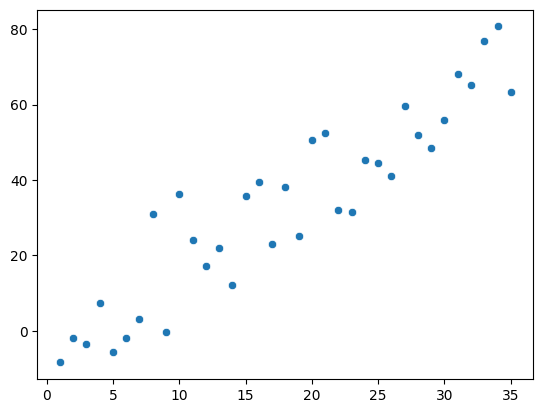

In [119]:
noisy_Y= Y + np.random.normal(loc=0, scale=10, size=len(Y))

import seaborn as sns
plot=sns.scatterplot(x=X,y=noisy_Y)
plot

In [120]:
class regress():
    def __init__(self, input, outcome):
        self.slope= covariance(input,outcome) / variance(input)
        self.constant= mean(outcome) - mean(input) * self.slope
        self.predictions=self.constant+self.slope*input


reg=regress(X, noisy_Y)
print(f'slope={reg.slope}')
print(f'constant={reg.constant}')
print(f'predictions={reg.predictions}')

slope=2.241824255533239
constant=-7.215949503977036
predictions=[-4.97412525 -2.73230099 -0.49047674  1.75134752  3.99317177  6.23499603
  8.47682028 10.71864454 12.9604688  15.20229305 17.44411731 19.68594156
 21.92776582 24.16959007 26.41141433 28.65323858 30.89506284 33.1368871
 35.37871135 37.62053561 39.86235986 42.10418412 44.34600837 46.58783263
 48.82965688 51.07148114 53.3133054  55.55512965 57.79695391 60.03877816
 62.28060242 64.52242667 66.76425093 69.00607518 71.24789944]


<Axes: >

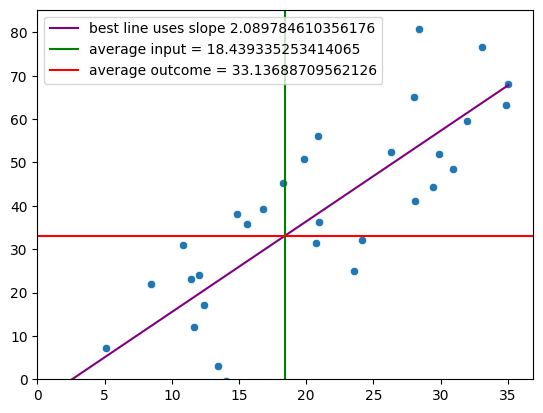

In [141]:
def visual(input, outcome):
    
    plot=sns.scatterplot(x=input,y=outcome)
    reg=regress(input, outcome)

    sns.lineplot(x=input, y=reg.predictions, color='purple', 
                 label=f'best line uses slope {reg.slope}')

    plot.axvline(x=np.mean(input), color='green', label=f'average input = {np.mean(input)}')
    plot.axhline(y=np.mean(outcome), color='red', label=f'average outcome = {np.mean(outcome)}')

    plot.set_xlim(left=0)
    plot.set_ylim(bottom=0)

    plot.legend()
    
    return plot

visual(X, noisy_Y)

# SAMPLING

In [122]:
combined_data=np.column_stack([X,noisy_Y])
combined_data

array([[ 1.        , -8.41822079],
       [ 2.        , -1.87327561],
       [ 3.        , -3.49433264],
       [ 4.        ,  7.30181495],
       [ 5.        , -5.53638907],
       [ 6.        , -2.03168816],
       [ 7.        ,  3.13459827],
       [ 8.        , 30.96759538],
       [ 9.        , -0.42463413],
       [10.        , 36.33197331],
       [11.        , 24.0804726 ],
       [12.        , 17.04354654],
       [13.        , 22.00309205],
       [14.        , 12.166781  ],
       [15.        , 35.83147194],
       [16.        , 39.33843449],
       [17.        , 23.12951082],
       [18.        , 38.11667908],
       [19.        , 25.00649019],
       [20.        , 50.72256868],
       [21.        , 52.39675406],
       [22.        , 32.11408651],
       [23.        , 31.39624144],
       [24.        , 45.22635679],
       [25.        , 44.45217434],
       [26.        , 41.11423672],
       [27.        , 59.55148313],
       [28.        , 51.87842911],
       [29.        ,

In [123]:
import pandas as pd
population_data=pd.DataFrame(data=combined_data, columns=['input', 'outcome'])
population_data

,input,outcome
0,1.0,-8.418221
1,2.0,-1.873276
2,3.0,-3.494333
3,4.0,7.301815
4,5.0,-5.536389
5,6.0,-2.031688
6,7.0,3.134598
7,8.0,30.967595
8,9.0,-0.424634
9,10.0,36.331973


In [124]:

population_data.describe()

,input,outcome
count,35.000000,35.000000
mean,18.000000,33.136887
std,10.246951,24.862859
min,1.000000,-8.418221
25%,9.500000,14.605164
50%,18.000000,35.831472
75%,26.500000,51.300499
max,35.000000,80.708650


In [125]:
bad_sample=population_data[0:10]
bad_sample


,input,outcome
0,1.0,-8.418221
1,2.0,-1.873276
2,3.0,-3.494333
3,4.0,7.301815
4,5.0,-5.536389
5,6.0,-2.031688
6,7.0,3.134598
7,8.0,30.967595
8,9.0,-0.424634
9,10.0,36.331973


In [126]:

bad_sample.describe()

,input,outcome
count,10.00000,10.000000
mean,5.50000,5.595744
std,3.02765,15.458074
min,1.00000,-8.418221
25%,3.25000,-3.128672
50%,5.50000,-1.148955
75%,7.75000,6.260011
max,10.00000,36.331973


In [127]:
good_sample=population_data.sample(10)
good_sample

,input,outcome
19,20.0,50.722569
32,33.0,76.737999
3,4.0,7.301815
28,29.0,48.387993
2,3.0,-3.494333
21,22.0,32.114087
18,19.0,25.006490
30,31.0,68.115619
11,12.0,17.043547
4,5.0,-5.536389


In [128]:

good_sample.describe()

,input,outcome
count,10.000000,10.000000
mean,17.800000,31.639940
std,11.360751,28.819509
min,3.000000,-5.536389
25%,6.750000,9.737248
50%,19.500000,28.560288
75%,27.250000,50.138925
max,33.000000,76.737999


# SAMPLE ESTIMATES

In [129]:
new_pop=np.linspace(1,1000,1000)

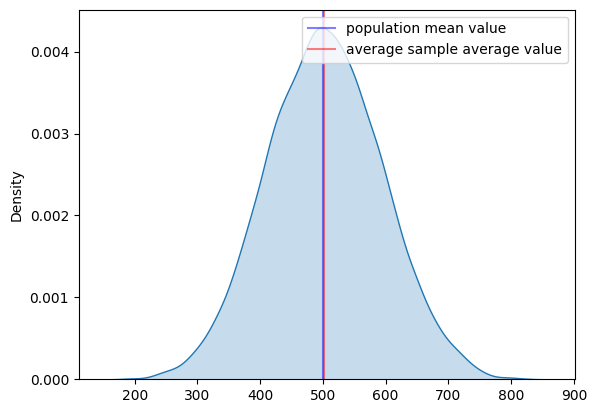

In [130]:
sample_averages=[]
for i in range(10000):
    new_sample=np.random.choice(new_pop, 10)
    sample_averages.append(np.mean(new_sample))

sample_avg_dist=sns.kdeplot(sample_averages, fill=True)
sample_avg_dist.axvline(x=np.mean(new_pop), label='population mean value', color='blue', alpha=0.5)
sample_avg_dist.axvline(x=np.mean(sample_averages), label='average sample average value', color='red', alpha=0.5)
sample_avg_dist.legend()

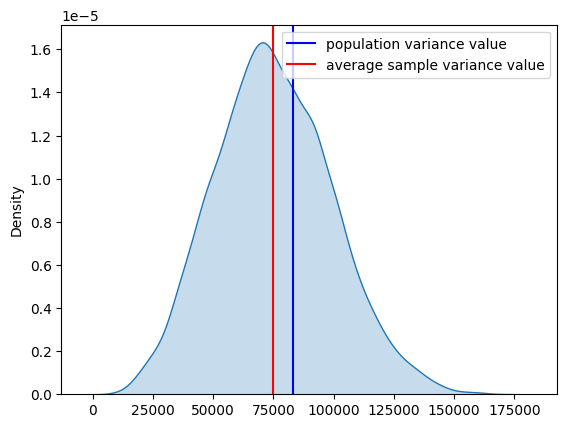

In [131]:
sample_variances=[]
for i in range(10000):
    new_sample=np.random.choice(new_pop, 10)
    sample_variances.append(variance(new_sample))

sample_var_dist=sns.kdeplot(sample_variances, fill=True)
sample_var_dist.axvline(x=variance(new_pop), label='population variance value', color='blue')
sample_var_dist.axvline(x=np.mean(sample_variances), label='average sample variance value', color='red')
sample_var_dist.legend()

In [132]:
#the variance equation has to be adjusted for when we use it on a sample because samples are smaller than the population, so they have less variety or variance

def sample_variance(data_set):
    distances=[]

    for data_point in data_set:
        difference_from_mean= data_point- mean(data_set)
        squared_distance= difference_from_mean * difference_from_mean
        distances.append(squared_distance)

    return sum(distances)/(len(distances)-1) #instead of dividing the sum by the count, we divide it by one less than the count

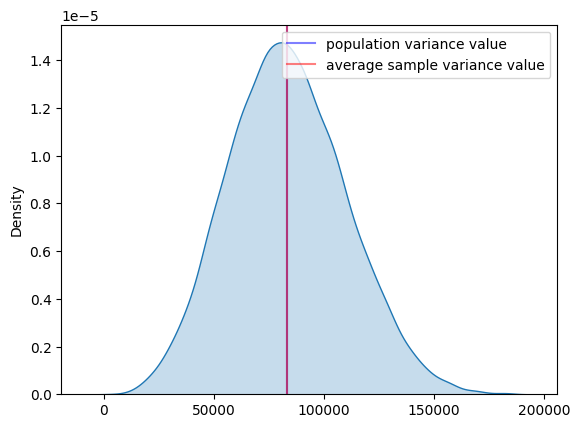

In [133]:
sample_variances=[]
for i in range(10000):
    new_sample=np.random.choice(new_pop, 10)
    sample_variances.append(sample_variance(new_sample))

sample_var_dist=sns.kdeplot(sample_variances, fill=True)
sample_var_dist.axvline(x=variance(new_pop), label='population variance value', color='blue', alpha=0.5)
sample_var_dist.axvline(x=np.mean(sample_variances), label='average sample variance value', color='red', alpha=0.5)
sample_var_dist.legend()

# MULTIPLE REGRESSION AND CAUSALITY

In [144]:
X=X+np.random.normal(0,5,len(X))
Z=X+np.random.normal(0,5,len(X))
Y=X+2*Z+np.random.normal(0,5,len(X))

<Axes: >

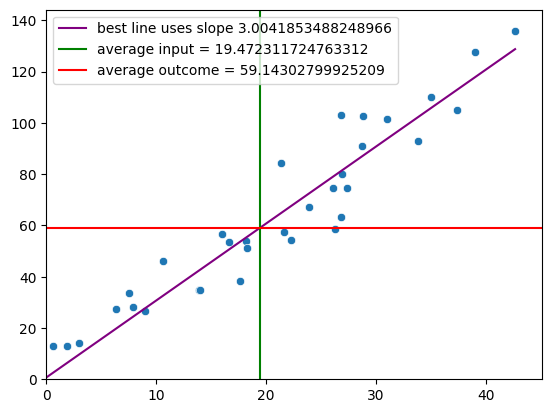

In [145]:
visual(X,Y)

<Axes: >

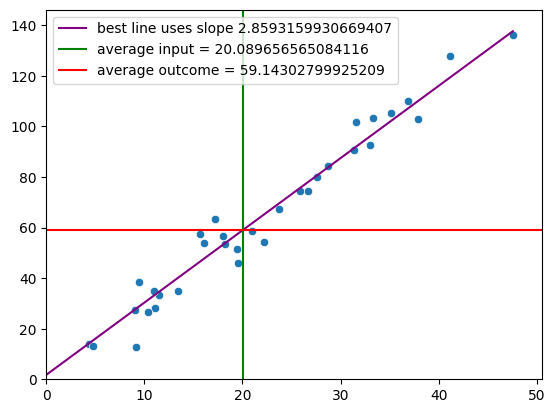

In [146]:
visual(Z,Y)

In [147]:
covariance(X,Z) #explain ommitted variable bias

145.3089101465615

<Axes: >

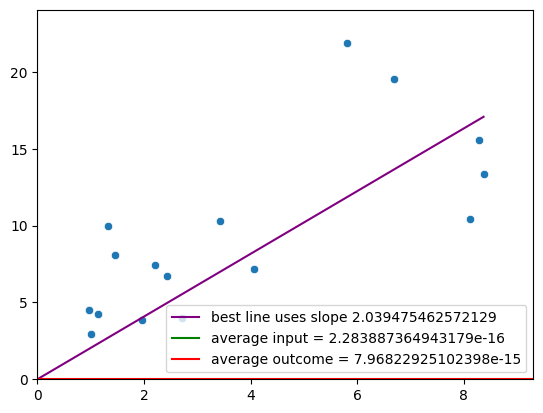

In [148]:
Y_no_X= Y - regress(X,Y).predictions
Z_no_X= Z - regress(X,Z).predictions
visual(Z_no_X, Y_no_X)

<Axes: >

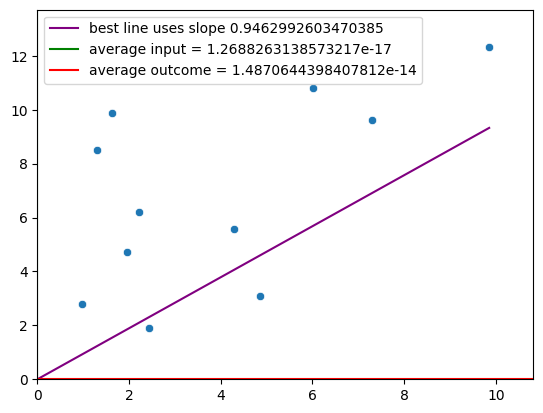

In [149]:
Y_no_Z= Y - regress(Z,Y).predictions
X_no_Z= X - regress(Z,X).predictions
visual(X_no_Z, Y_no_Z)

In [150]:
import statsmodels.api as sm
combined_input=np.column_stack([X,Z])
input_data=pd.DataFrame(data=combined_input, columns=['X','Z'])
input_data=sm.add_constant(input_data)
input_data

,const,X,Z
0,1.0,0.454085,-6.802537
1,1.0,-6.464753,-12.116382
2,1.0,2.986156,4.414547
3,1.0,7.892895,11.126871
4,1.0,6.400837,9.104752
5,1.0,21.353935,28.682771
6,1.0,10.634389,19.544512
7,1.0,0.626217,9.196707
8,1.0,22.269444,22.222597
9,1.0,13.942560,13.439286


In [151]:
regression_model=sm.OLS(Y, input_data).fit()
regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     956.0
Date:                Mon, 19 Feb 2024   Prob (F-statistic):           2.91e-29
Time:                        19:03:50   Log-Likelihood:                -104.70
No. Observations:                  35   AIC:                             215.4
Df Residuals:                      32   BIC:                             220.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2560      1.626     -0.157      0.876      -3.567       3.056
X              0.9463      0.200      4.728      0.000       0.539       1.354
Z              2.0395      0.185     10.998      0.000       1.662       2.417
==============================================================================
Omnibus:                        0.220   Durbin-Watson:                   2.181
Prob(Omnibus):                  0.896   Jarque-Bera (JB):                0.275
Skew:                          -0.168   Prob(JB):                        0.872
Kurtosis:                       2.726   Cond. No.                         62.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

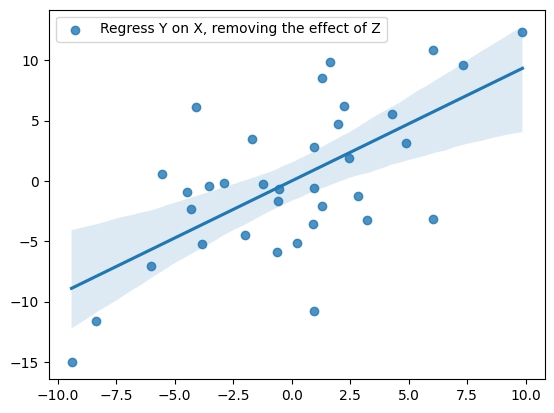

In [154]:
plot=sns.regplot(x=X_no_Z, y=Y_no_Z, label='Regress Y on X, removing the effect of Z')
plot.legend()

FOR MORE IN-DEPTH DISCUSSIONS OF THESE TOPICS, CHECK OUT THE PREVIOUS VIDEOS!  :)